In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# 1. EDA

### Пройдите по основным шагам работы с данными - базовые статистики, визуализации (распределения, корреляции, pair plots), предобработка переменных. Переменные, которые пока нужно убрать: id, name, host_id, host_name, last_review.

In [3]:
data = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'])
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### *Видно, что в столбцах price, minimum_nights, number_of_reviews, reviewes_per_month, calculated_host_listgings_count максимальные значения существенно отличаются от среднего значения.*

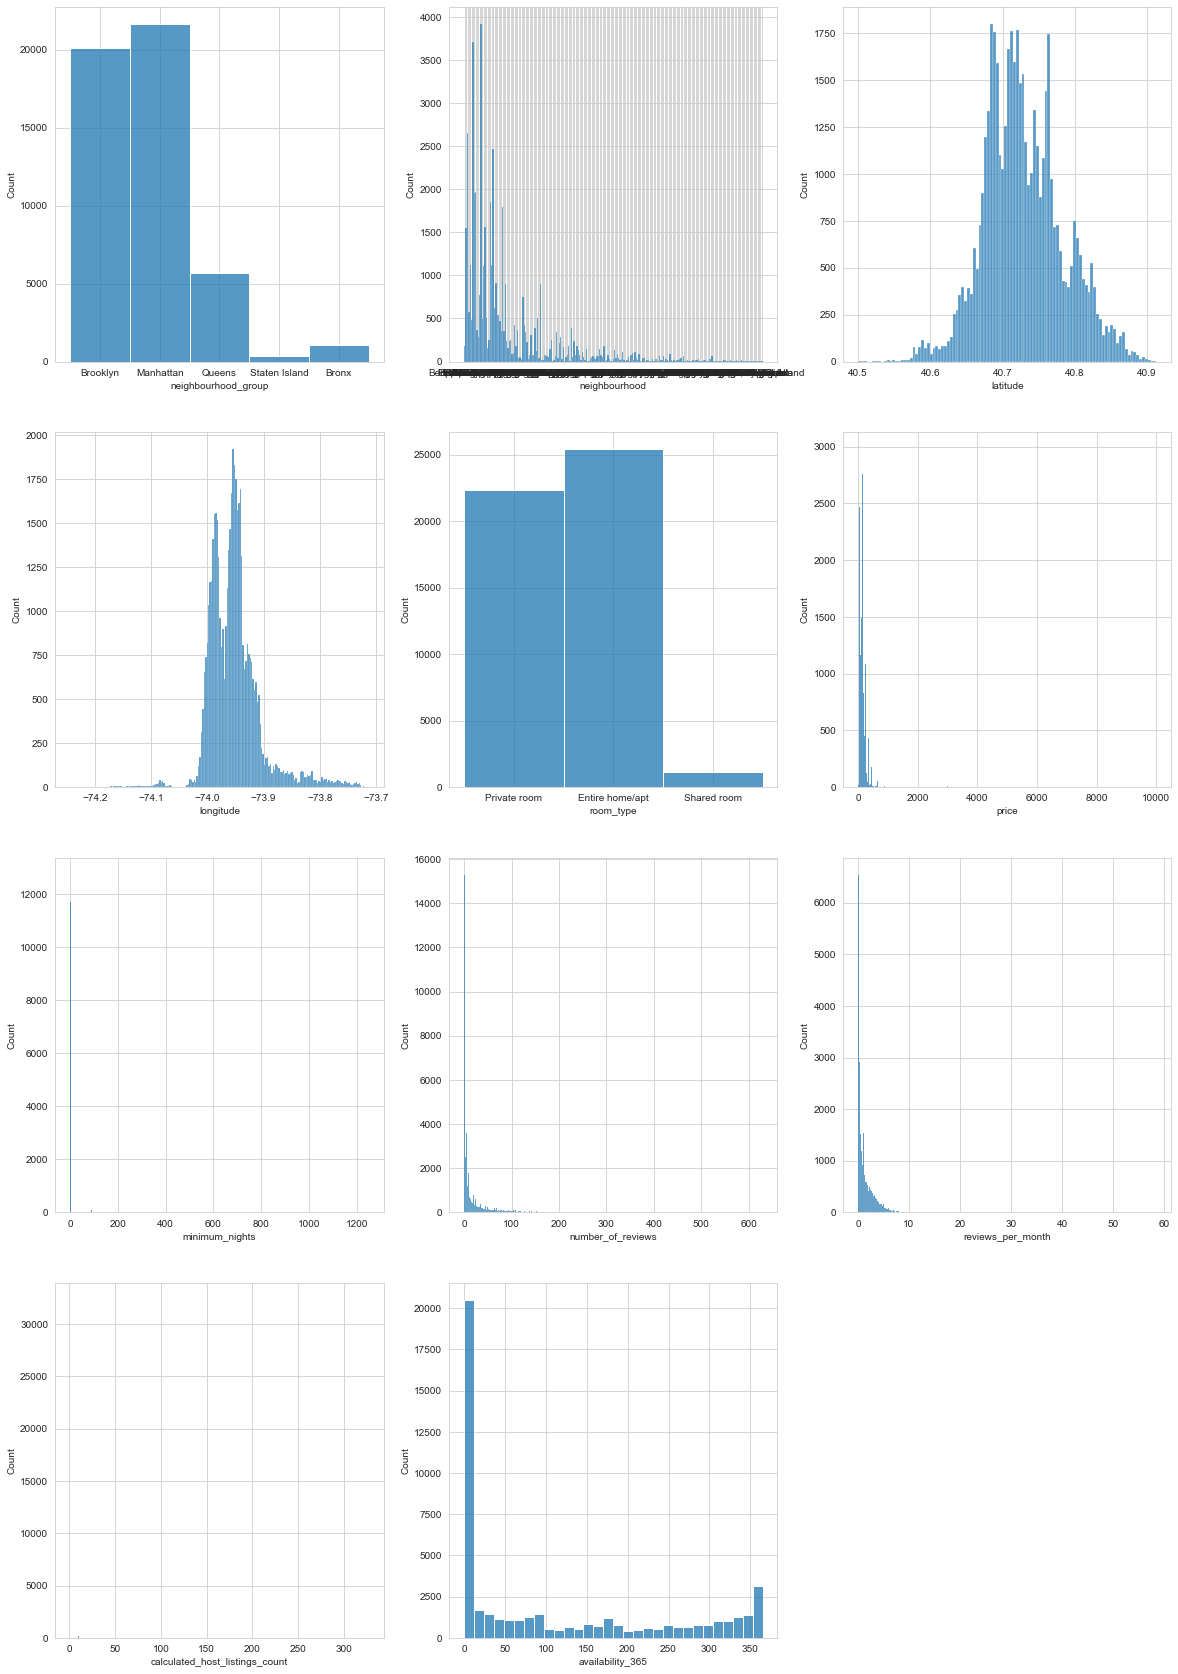

In [4]:
def plot_hists(data_frame, x_size):
    column_count = len(data_frame.columns)
    line_counts = column_count // x_size

    if column_count % x_size:
        line_counts += 1

    figure = plt.figure(figsize=(20, 30))

    for index, column in enumerate(data_frame, start=1):
        ax = figure.add_subplot(line_counts, x_size, index)
        sns.histplot(data=data, ax=ax, x=column)

plot_hists(data, x_size=3)

### *Некоторые переменные невозможно нормально проанализировать из-за аномальных значений. Построим графики без значений выходящих за передел 3-х сигм.*

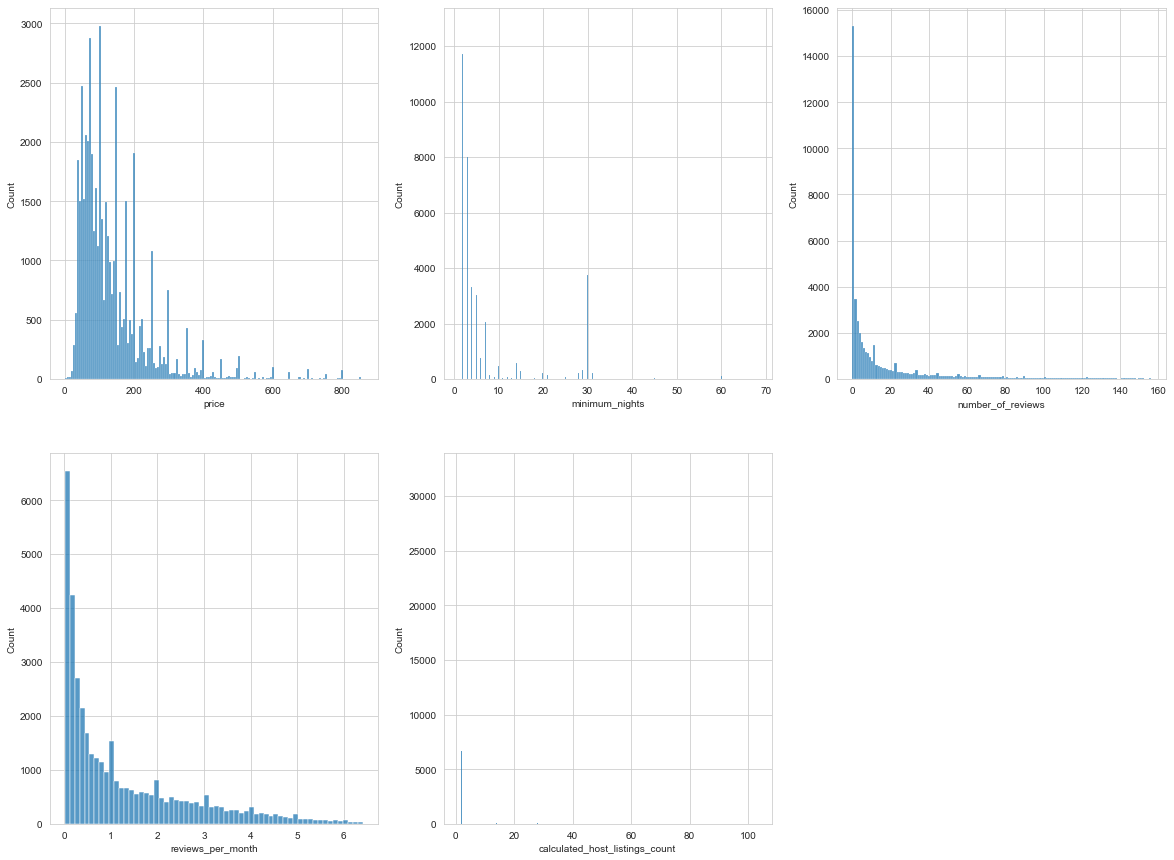

In [5]:
from scipy.stats import zscore

def plot_hists_without_peaks(data_frame, x_size, columns):
    column_count = len(columns)
    line_counts = column_count // x_size

    if column_count % x_size:
        line_counts += 1

    figure = plt.figure(figsize=(20, 15))

    for index, column in enumerate(columns, start=1):
        values = data_frame[column].dropna()
        ax = figure.add_subplot(line_counts, x_size, index)
        ax.set(xlabel=column)
        sns.histplot(values.where(zscore(values) < 3), ax=ax)

plot_hists_without_peaks(data, x_size=3, columns=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count'])

In [6]:
data['calculated_host_listings_count'].describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='Count'>

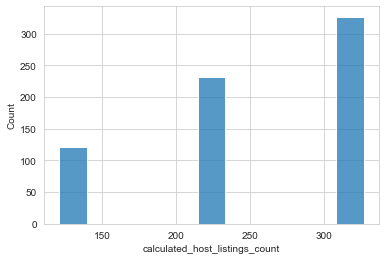

In [7]:
sns.histplot(data['calculated_host_listings_count'].where(zscore(data['calculated_host_listings_count']) > 3))

### *Признак calculated_host_listing_count имеет большой разброс значений, при этом большая часть (75%) это значения 1 и 2.*

### *Построим матрицу корреляций*

<AxesSubplot:>

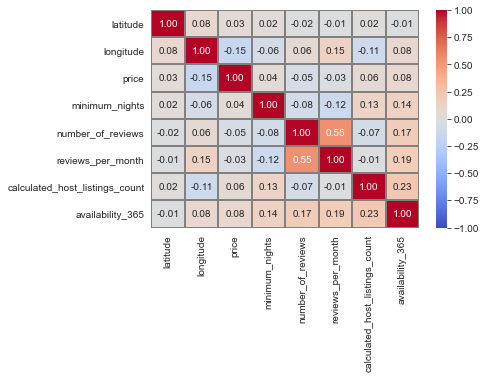

In [8]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, center=0,
            linewidth=1, linecolor='gray', cmap='coolwarm')

### *Построим графики pairplot.*

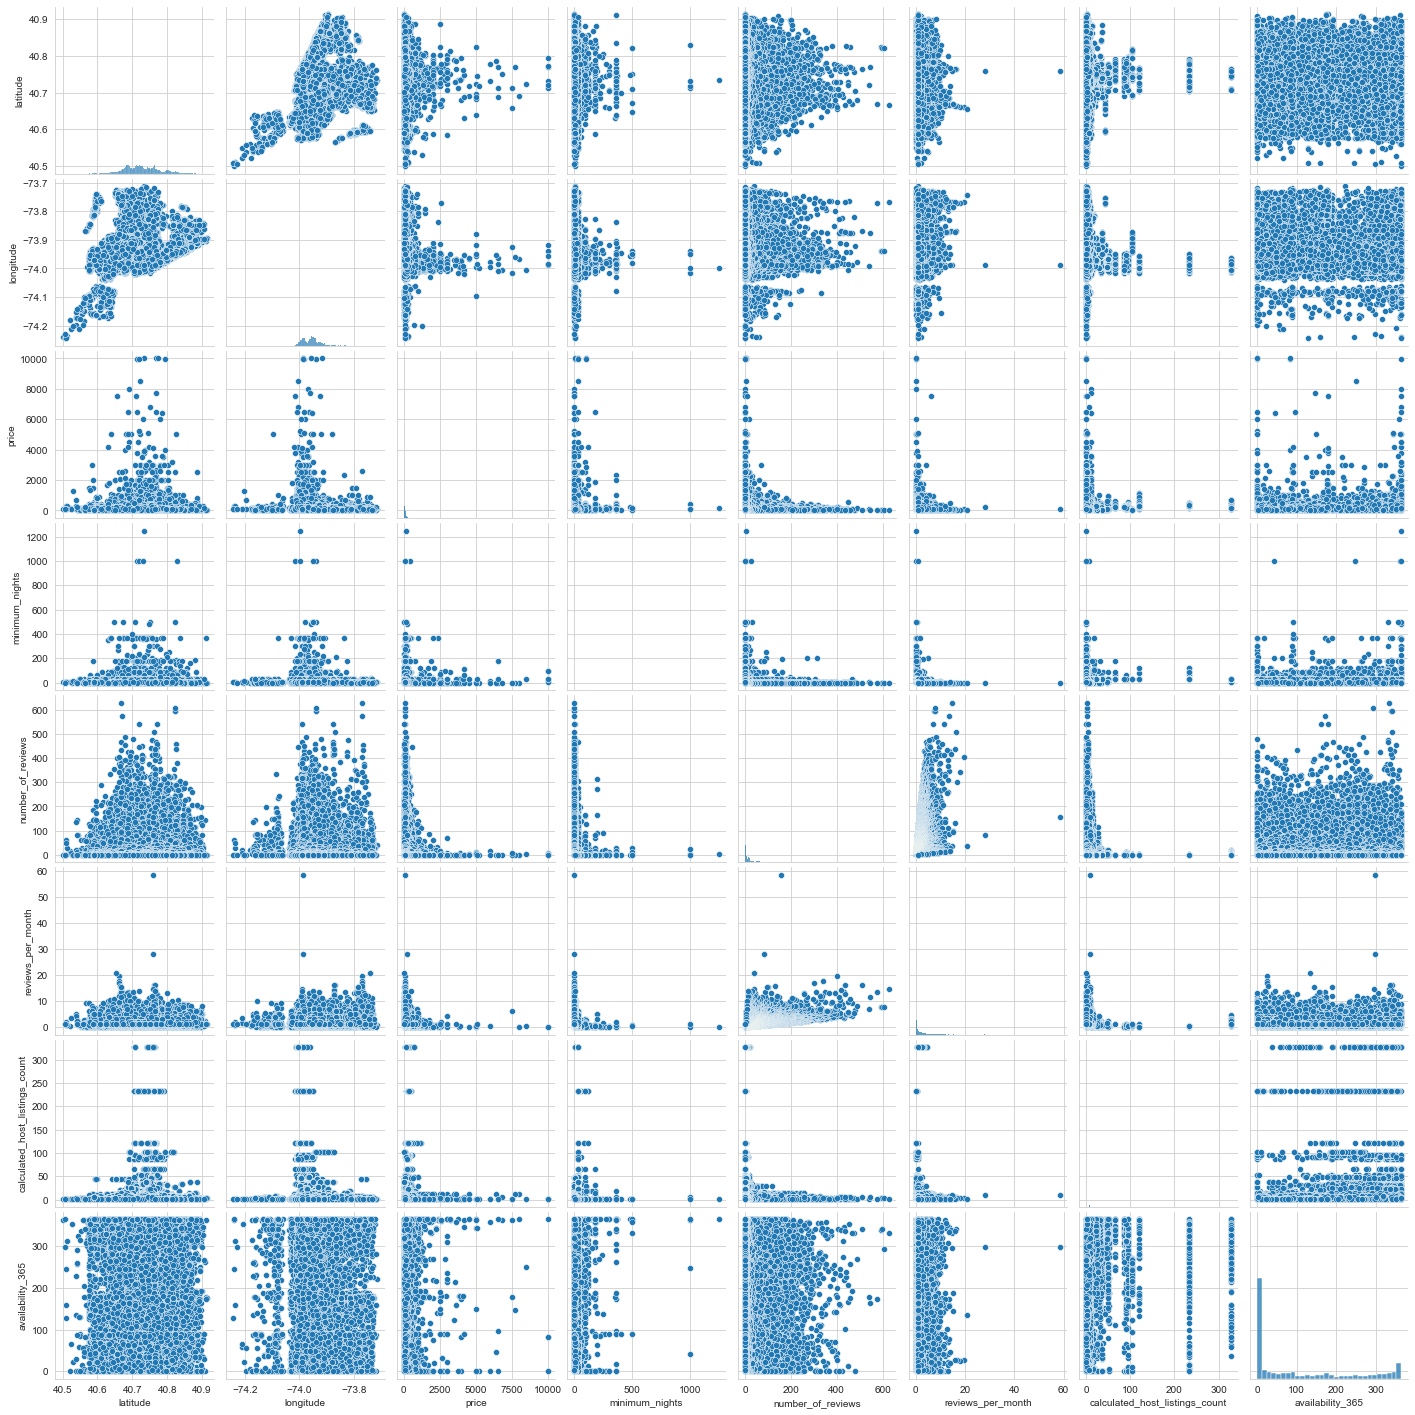

In [9]:
sns.pairplot(data);

### *Имеется заметная корреляция между признаками number_of_reviews и reviews_per_month.*

# Часть 2. Preprocessing & Feature Engineering

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


### *Признак reviews_per_month имеет пропуски, заполним их случайными значениями из уже имеющихся данных в соответствии с вероятностью появления конкретного значения.*

In [11]:
reviews_stat = data['reviews_per_month'].value_counts(normalize=True)
missing_reviews = data['reviews_per_month'].isnull()

data.loc[missing_reviews, 'reviews_per_month'] = np.random.choice(reviews_stat.index, size=len(data[missing_reviews]), p=reviews_stat.values)

<AxesSubplot:xlabel='reviews_per_month', ylabel='Count'>

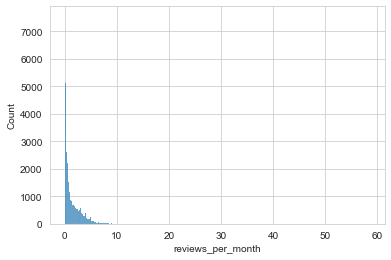

In [12]:
sns.histplot(data, x='reviews_per_month')

## Обратите внимание на распределение целевой переменной, возможно, с ней тоже можно поработать.

<AxesSubplot:xlabel='price', ylabel='Count'>

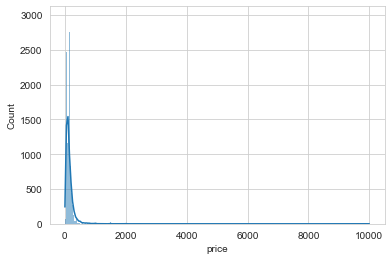

In [13]:
sns.histplot(data, x='price', kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

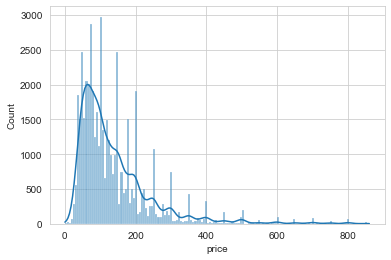

In [14]:
price = data['price'].where(zscore(data['price']) <= 3)
sns.histplot(price, kde=True)

### *Распределение цены похоже на биноминальное. Имеются большие значение, значительно превышающие порог трёх сигм. Можно будет поработать с ними в части моделирования.*

# Часть 3. Моделирование. Постройте модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV. Ваша цель получить как можно более высокие метрики качества (можно взять несколько, R2, MAE, RMSE).

In [15]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def fit_and_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        'Model': type(model).__name__,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

## Опробуйте различные техники: работа с категориальными переменными, замена аномалий, различные варианты шкалирования непрерывных переменных (StandardScaler, RobustScaler, и.т.д.).

## *OneHotEncoder*

In [16]:
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split

object_features = list(data.select_dtypes(include=['object']).columns)

encoder = OneHotEncoder()

encoded_data = data.drop(object_features, axis = 1)\
    .join(encoder.fit_transform(data[object_features], axis = 0))

learning_data = train_test_split(encoded_data.drop('price', axis=1), encoded_data['price'], test_size=0.3, random_state=555)

models = [
    LinearRegression(),
    LassoCV(cv=5, random_state=555),
    RidgeCV(cv=5),
    ElasticNetCV(cv=5, random_state=555)
]

result = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R2', 'Method'])

for model in models:
    metrics = fit_and_score(model, *learning_data)
    result = result.append({'Method': 'OneHotEncoder', **metrics}, ignore_index=True)

result

,Model,MAE,MSE,R2,Method
0,LinearRegression,2.421977e+06,2.151072e+16,-3.988294e+11,OneHotEncoder
1,LassoCV,7.346871e+01,4.898456e+04,9.177944e-02,OneHotEncoder
2,RidgeCV,7.077185e+01,4.789586e+04,1.119650e-01,OneHotEncoder
3,ElasticNetCV,8.629701e+01,5.195845e+04,3.664060e-02,OneHotEncoder


## *OrdinalEncoder*

In [17]:
from category_encoders import OrdinalEncoder

object_features = list(data.select_dtypes(include=['object']).columns)

encoder = OrdinalEncoder()
encoded_data = data.copy()

for feature in object_features:
    encoded_data[feature] = encoder.fit_transform(encoded_data[[feature]])

learning_data = train_test_split(encoded_data.drop('price', axis=1), encoded_data['price'], test_size=0.3, random_state=555)

models = [
    LinearRegression(),
    LassoCV(cv=5, random_state=555),
    RidgeCV(cv=5),
    ElasticNetCV(cv=5, random_state=555)
]

for model in models:
    metrics = fit_and_score(model, *learning_data)
    result = result.append({'Method': 'OrdinalEncoder', **metrics}, ignore_index=True)

result

,Model,MAE,MSE,R2,Method
0,LinearRegression,2.421977e+06,2.151072e+16,-3.988294e+11,OneHotEncoder
1,LassoCV,7.346871e+01,4.898456e+04,9.177944e-02,OneHotEncoder
2,RidgeCV,7.077185e+01,4.789586e+04,1.119650e-01,OneHotEncoder
3,ElasticNetCV,8.629701e+01,5.195845e+04,3.664060e-02,OneHotEncoder
4,LinearRegression,7.675105e+01,5.019219e+04,6.938880e-02,OrdinalEncoder
5,LassoCV,7.869762e+01,5.091763e+04,5.593839e-02,OrdinalEncoder
6,RidgeCV,7.670854e+01,5.019141e+04,6.940331e-02,OrdinalEncoder
7,ElasticNetCV,8.847942e+01,5.257884e+04,2.513806e-02,OrdinalEncoder


## *CountEncoder*

In [18]:
from category_encoders import CountEncoder

object_features = list(data.select_dtypes(include=['object']).columns)

encoder = CountEncoder()
encoded_data = data.copy()

for feature in object_features:
    encoded_data[feature] = encoder.fit_transform(encoded_data[[feature]])

learning_data = train_test_split(encoded_data.drop('price', axis=1), encoded_data['price'], test_size=0.3, random_state=555)

models = [
    LinearRegression(),
    LassoCV(cv=5, random_state=555),
    RidgeCV(cv=5),
    ElasticNetCV(cv=5, random_state=555)
]

for model in models:
    metrics = fit_and_score(model, *learning_data)
    result = result.append({'Method': 'CountEncoder', **metrics}, ignore_index=True)

result

,Model,MAE,MSE,R2,Method
0,LinearRegression,2.421977e+06,2.151072e+16,-3.988294e+11,OneHotEncoder
1,LassoCV,7.346871e+01,4.898456e+04,9.177944e-02,OneHotEncoder
2,RidgeCV,7.077185e+01,4.789586e+04,1.119650e-01,OneHotEncoder
3,ElasticNetCV,8.629701e+01,5.195845e+04,3.664060e-02,OneHotEncoder
4,LinearRegression,7.675105e+01,5.019219e+04,6.938880e-02,OrdinalEncoder
5,LassoCV,7.869762e+01,5.091763e+04,5.593839e-02,OrdinalEncoder
6,RidgeCV,7.670854e+01,5.019141e+04,6.940331e-02,OrdinalEncoder
7,ElasticNetCV,8.847942e+01,5.257884e+04,2.513806e-02,OrdinalEncoder
8,LinearRegression,8.330169e+01,5.071617e+04,5.967370e-02,CountEncoder
9,LassoCV,8.449566e+01,5.131981e+04,4.848171e-02,CountEncoder


### *Из таблицы выше видно, что самые лучшие оценки дала модель RidgeCV с OneHotEncoder. Посмотрим вклад коэффециентов.*

In [19]:
object_features = list(data.select_dtypes(include=['object']).columns)

encoder = OneHotEncoder(use_cat_names=True)
encoded_data = data.drop(object_features, axis = 1)\
    .join(encoder.fit_transform(data[object_features], axis=0)).dropna()

X_train, X_test, y_train, y_test = train_test_split(encoded_data.drop('price', axis=1), encoded_data['price'], test_size=0.3, random_state=555)

model = RidgeCV(cv=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)

importances[:10]

,Attribute,Importance
89,neighbourhood_Tribeca,203.074264
113,neighbourhood_Battery Park City,151.392997
149,neighbourhood_Sea Gate,90.646979
207,neighbourhood_Prince's Bay,81.369470
234,room_type_Entire home/apt,77.552269
8,neighbourhood_group_Manhattan,76.101661
15,neighbourhood_Clinton Hill,62.478424
132,neighbourhood_City Island,61.725241
39,neighbourhood_SoHo,60.318913
48,neighbourhood_Cobble Hill,59.903493


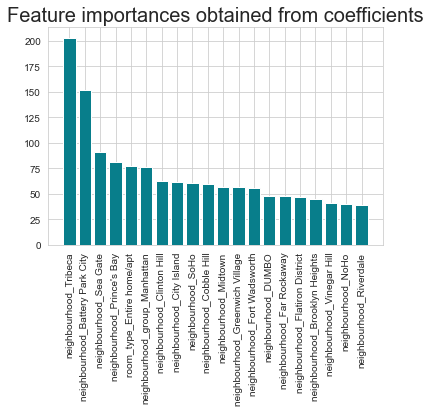

In [21]:
plt.bar(x=importances[:20]['Attribute'], height=importances[:20]['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### *Наибольший вклад дает признак neighborhood = Tribeca*

## *Попробуем различные варианты кодирования непрерывных переменных*

In [22]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

scalers = [MinMaxScaler(), RobustScaler(), StandardScaler()]

result = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R2', 'Method'])

for scaler in scalers:
    ct = ColumnTransformer([
        ('scale', scaler, make_column_selector(dtype_include=np.number)),
        ('onehot', OneHotEncoder(), object_features)
    ])

    pipe = Pipeline([('ct', ct), ('ridge', RidgeCV(cv=5))])

    learning_data = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.3, random_state=555)

    metrics = fit_and_score(pipe, *learning_data)
    result = result.append({'Method': type(scaler).__name__, **metrics}, ignore_index=True)

result

,Model,MAE,MSE,R2,Method
0,Pipeline,70.626113,47876.038369,0.112332,MinMaxScaler
1,Pipeline,70.770429,47897.296978,0.111938,RobustScaler
2,Pipeline,70.772076,47897.248286,0.111939,StandardScaler


### *Для модели Ridge-регрессии выбор сколера практически не влияет на качество.*
### *Попробуем улучшить качество за счет изменения в данных.*
### *Добавим расстояние до Манхэттена.*

In [23]:
def learn_ridge_regression(data_frame):
    ct = ColumnTransformer([
            ('scale', StandardScaler(), make_column_selector(dtype_include=np.number)),
            ('onehot', OneHotEncoder(), object_features)
        ])

    pipe = Pipeline([('ct', ct), ('ridge', RidgeCV(cv=5))])

    learning_data = train_test_split(data_frame.drop('price', axis=1), data_frame['price'], test_size=0.3, random_state=555)

    metrics = fit_and_score(pipe, *learning_data)
    return metrics

In [24]:
def euclidian_distance_to_manhattan(latitude, longitude):
    return np.sqrt((40.783430 - latitude)**2 + (-73.966250 - longitude)**2)

new_data = data.copy()
new_data['euclidian_distance_to_manhattan'] = euclidian_distance_to_manhattan(new_data.latitude, new_data.longitude)

new_data = new_data.drop(['latitude', 'longitude'], axis=1)

print(learn_ridge_regression(new_data))

{'Model': 'Pipeline', 'MAE': 70.76208298691846, 'MSE': 47891.77944535905, 'R2': 0.1120406340298139}


In [25]:
def manhattan_distance_to_manhattan(latitude, longitude):
    return np.abs(40.783430 - latitude) + np.abs(-73.966250 - longitude)

new_data = data.copy()
new_data['manhattan_distance_to_manhattan'] = manhattan_distance_to_manhattan(new_data.latitude, new_data.longitude)

new_data = new_data.drop(['latitude', 'longitude'], axis=1)

print(learn_ridge_regression(new_data))

{'Model': 'Pipeline', 'MAE': 70.74242366340528, 'MSE': 47888.36929510644, 'R2': 0.11210386147492524}


In [26]:
new_data = data.copy()

new_data['euclidian_distance_to_manhattan'] = euclidian_distance_to_manhattan(new_data.latitude, new_data.longitude)
new_data['manhattan_distance_to_manhattan'] = manhattan_distance_to_manhattan(new_data.latitude, new_data.longitude)

new_data = new_data.drop(['latitude', 'longitude'], axis=1)

print(learn_ridge_regression(new_data))

{'Model': 'Pipeline', 'MAE': 70.74651116108501, 'MSE': 47888.22794149261, 'R2': 0.11210648230603182}


### *Добавление евклидова и манхэттоновских расстояний до Манхэттена не улучшили качество обучаемой модели.*

### *Посмотрим еще раз на распределение цены, в частности на аномальные значения, которых выходят за пределы трех среднеквадратичных отклонений.*

<AxesSubplot:xlabel='price', ylabel='Count'>

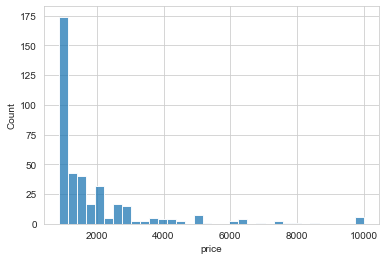

In [27]:
abnormal_price = data['price'].where(zscore(data['price']) > 3)
sns.histplot(abnormal_price)

In [28]:
abnormal_price.min()

875.0

### *Сильные отклонения значений цены начинаются с 875 долларов. Заменим все сильные отклонения на эти значения и посмотрим на качество обучения модели.*

In [29]:
new_data = data.copy()

new_data['price'] = new_data['price'].apply(lambda x: x if x < 875 else 875)

print(learn_ridge_regression(new_data))

{'Model': 'Pipeline', 'MAE': 57.606454139697725, 'MSE': 10408.579624515161, 'R2': 0.3291563171352909}


### *Полученные результаты гораздо лучше полученных ранее.*

# Выводы.

### *Для данного датасета лучше всего подошли - модель RidgeCV с количеством фолдов равным 5, кодирование категориальных переменных методом OneHotEncoding.*

### *Масштабирование непрерывных признаков различными сколерами не привело к улучшению результатов - скорее всего их применение улучшает (уменьшает) скорость обучения.*

### *Добавление в датасет расстояния до Манхэттена не улучшило качество модели.*

### *Замена сильных отклонений в значениях цены позволило значительно улучшить качество модели. Возможно, сильные отклонения описываются признаками, не попавшими в датасет.*